### TITANIC DATASET

### Import Libraries, Read Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('/Users/home/Downloads/train.csv')
data1 = data
print(data.shape)
print(' ')
data.head()

(891, 12)
 


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Cleaning

In [5]:
print(data.isnull())

     PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare  Cabin  Embarked

In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
data = data.replace('?', np.nan)

In [8]:
colna_sum = data.isnull().sum()
print("Columns with NA values")
print("")
print(colna_sum[colna_sum>0])
print("")
print("Total NA values = {naval_sum:n}".format(naval_sum = data.isnull().sum().sum()))

Columns with NA values

Age         177
Cabin       687
Embarked      2
dtype: int64

Total NA values = 866


In [9]:
def replacena_mean(df,k):
    for i in k:
        a = df[i].astype('float').mean(axis =0)
        df[i].replace(np.nan,a,inplace= True)
    return df

def replacena_mode(df,k):
    for i in k:
        df[i].fillna(df[i].mode()[0], inplace = True)
    return df

def replacena_median(df,k):
    for i in k:
        a = df[i].astype('float').median(axis =0)
        df[i].replace(np.nan,a,inplace= True)
    return df

In [10]:
for i in data.describe(include=np.object).columns:
    print(i)
    print(data[i].value_counts())
    print("")
    print("")

Name
Keane, Mr. Andrew "Andy"                 1
Newell, Miss. Marjorie                   1
Bystrom, Mrs. (Karolina)                 1
Carlsson, Mr. August Sigfrid             1
Greenfield, Mr. William Bertram          1
                                        ..
Sirota, Mr. Maurice                      1
Richards, Mrs. Sidney (Emily Hocking)    1
Niskanen, Mr. Juha                       1
Slemen, Mr. Richard James                1
Youseff, Mr. Gerious                     1
Name: Name, Length: 891, dtype: int64


Sex
male      577
female    314
Name: Sex, dtype: int64


Ticket
347082      7
CA. 2343    7
1601        7
347088      6
CA 2144     6
           ..
315096      1
2672        1
349248      1
PC 17603    1
349244      1
Name: Ticket, Length: 681, dtype: int64


Cabin
G6             4
B96 B98        4
C23 C25 C27    4
E101           3
F33            3
              ..
C90            1
A24            1
C148           1
C110           1
C128           1
Name: Cabin, Length: 147, dt

In [11]:
data = data.drop(['Cabin'], axis = 1)
data = data.drop(['PassengerId'], axis = 1)
data = data.drop(['Name'], axis = 1)
data = data.drop(['Ticket'], axis = 1)

In [12]:
mdnv = ['Age']
mdv = ['Embarked']
replacena_mode(data,mdv)
replacena_median(data, mdnv)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [13]:
colna_sum = data.isnull().sum()
print("Columns with NA values")
print("")
print(colna_sum[colna_sum>0])
print("")
print("Total NA values = {naval_sum:n}".format(naval_sum = data.isnull().sum().sum()))

Columns with NA values

Series([], dtype: int64)

Total NA values = 0


In [14]:
data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [15]:
data['Age'] = data['Age'].astype('int')

In [16]:
data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age           int64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [17]:
from sklearn.preprocessing import LabelEncoder 
  
le = LabelEncoder() 
  
data['Embarked']= le.fit_transform(data['Embarked']) 
data['Sex']= le.fit_transform(data['Sex']) 

In [18]:
data = data.drop(['Age'], axis = 1)
data = data.drop(['SibSp'], axis = 1)
data = data.drop(['Parch'], axis = 1)

### Correlation

In [19]:
correlation = data.corr()
for i in data.describe().columns:
    a = correlation['Survived'][i]
    if (a > 0 or a < 0):
        sign = "Positive"
        if (a < 0):
            sign = "Negative"
        else:
            sign = "Positive"
        print("Column name: {gog:s}      Correlation: {fog:s}".format(gog = i, fog = sign))

Column name: Survived      Correlation: Positive
Column name: Pclass      Correlation: Negative
Column name: Sex      Correlation: Negative
Column name: Fare      Correlation: Positive
Column name: Embarked      Correlation: Negative


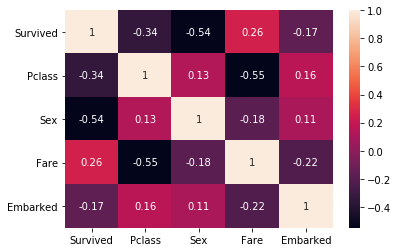

In [20]:
sns.heatmap(correlation, annot = True)
plt.show()

### Train Cv Test Split

In [21]:
def train_validate_test_split(df, train_percent=.6, validate_percent=.2, seed=None):
    np.random.seed(seed)
    perm = np.random.permutation(df.index)
    m = len(df.index)
    train_end = int(train_percent * m)
    validate_end = int(validate_percent * m) + train_end
    train = df.iloc[perm[:train_end]]
    validate = df.iloc[perm[train_end:validate_end]]
    test = df.iloc[perm[validate_end:]]
    return train, validate, test

In [22]:
train, validate, test = train_validate_test_split(data, train_percent=.6, validate_percent=.2, seed=None)

In [23]:
x_train = train.drop(['Survived'], axis = 1)
y_train = train['Survived']

In [24]:
x_cv = validate.drop(['Survived'], axis = 1)
y_cv = validate['Survived']

In [25]:
x_test = test.drop(['Survived'], axis = 1)
y_test = test['Survived']

### Logistic

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
yhat = LR.predict(x_test)
yhat

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0])

In [28]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)
cnf_matrix

array([[ 20,  50],
       [  3, 106]])

In [29]:
print('Accuracy: ' + str(float((cnf_matrix[0,0]+cnf_matrix[1,1])*100/np.sum(cnf_matrix))) + '%')

Accuracy: 70.39106145251397%


### Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [31]:
yhatrf_train = random_forest.predict(x_train)
yhatrf_train
from sklearn.metrics import confusion_matrix, accuracy_score
print(accuracy_score(y_train, yhatrf_train))

0.9176029962546817


In [32]:
yhatrf_cv = random_forest.predict(x_cv)
yhatrf_cv
from sklearn.metrics import confusion_matrix, accuracy_score
print(accuracy_score(y_cv, yhatrf_cv))

0.7584269662921348


In [33]:
yhatrf_test = random_forest.predict(x_test)
yhatrf_test
from sklearn.metrics import confusion_matrix, accuracy_score
print(accuracy_score(y_test, yhatrf_test))

0.7821229050279329


### Neural Network

In [34]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [35]:
import tensorflow as tf
from keras import models
from keras import layers

In [36]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.9):
            print("\nReached 90% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()

In [37]:
print("x_train_shape"+str(x_train.shape))
print("y_train_shape"+str(y_train.shape))
print("x_test_shape"+str(x_test.shape))
print("y_test_shape"+str(y_test.shape))

x_train_shape(534, 4)
y_train_shape(534,)
x_test_shape(179, 4)
y_test_shape(179,)


In [38]:
nn = models.Sequential()

In [39]:
#add layer1
nn.add(layers.Dense(512,activation="relu",input_shape =(4,)))
#add layer2
nn.add(layers.Dense(256,activation="relu"))
#add layer3
nn.add(layers.Dense(128,activation="relu"))
#add layer4
nn.add(layers.Dense(2,activation = "sigmoid"))

In [40]:
type(x_train)

pandas.core.frame.DataFrame

In [41]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_cv = to_categorical(y_cv)

In [42]:
print("x_train_shape"+str(x_train.shape))
print("y_train_shape"+str(y_train.shape))
print("x_test_shape"+str(x_test.shape))
print("y_test_shape"+str(y_test.shape))

x_train_shape(534, 4)
y_train_shape(534, 2)
x_test_shape(179, 4)
y_test_shape(179, 2)


In [43]:
nn.compile(optimizer="rmsprop",
           loss='binary_crossentropy',
           metrics = ['accuracy'])
#'sparse_categorical_crossentropy'

In [44]:
nn.fit(x_train,y_train,epochs=50, callbacks=[callbacks])

Epoch 1/50
17/17 [==============================] - 0s 3ms/step - loss: 1.0852 - accuracy: 0.6086
Epoch 2/50
17/17 [==============================] - 0s 3ms/step - loss: 0.7001 - accuracy: 0.6648
Epoch 3/50
17/17 [==============================] - 0s 3ms/step - loss: 0.6256 - accuracy: 0.6854
Epoch 4/50
17/17 [==============================] - 0s 2ms/step - loss: 0.6667 - accuracy: 0.6816
Epoch 5/50
17/17 [==============================] - 0s 2ms/step - loss: 0.5948 - accuracy: 0.7097
Epoch 6/50
17/17 [==============================] - 0s 2ms/step - loss: 0.6440 - accuracy: 0.6573
Epoch 7/50
17/17 [==============================] - 0s 3ms/step - loss: 0.6050 - accuracy: 0.6742
Epoch 8/50
17/17 [==============================] - 0s 2ms/step - loss: 0.5691 - accuracy: 0.6929
Epoch 9/50
17/17 [==============================] - 0s 2ms/step - loss: 0.5390 - accuracy: 0.7266
Epoch 10/50
17/17 [==============================] - 0s 2ms/step - loss: 0.5634 - accuracy: 0.7285
Epoch 11/50
17/17 [

In [45]:
val_loss,val_accuracy = nn.evaluate(x_cv,y_cv)
val_accuracy

6/6 [==============================] - 0s 1ms/step - loss: 0.8662 - accuracy: 0.7247


0.7247191071510315

In [46]:
test_loss,test_accuracy = nn.evaluate(x_test,y_test)

6/6 [==============================] - 0s 1ms/step - loss: 0.5238 - accuracy: 0.7765


In [47]:
test_accuracy

0.7765362858772278

### Hyperparameter - NN

RELU (512) RELU (256) RELU (128) SIGMOID (2)

EPOCH: 242

optimizer= "rmsprop"

loss= 'binary_crossentropy'

### Hyperparameter - RF

Eliminators - 100